# 라이브러리 import

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 데이터 셋 확인

In [10]:
data = pd.read_csv("D:/취업준비/원티드 프리온보딩/company_nps_data.csv", engine='python')

In [11]:
print(data.shape)

(99801, 6)


In [12]:
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [13]:
data.tail()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
99796,171439,4630622,2017,2,2402740,11
99797,239388,1045021,2018,10,1428800,9
99798,272304,181898,2018,3,392560,4
99799,362194,2100218,2018,12,874780,3
99800,124281,132900,2017,11,291940,5


In [14]:
print(data.dtypes)

회사ID        int64
연매출액        int64
년도          int64
월           int64
월별_연금보험료    int64
월별_직원수      int64
dtype: object


In [15]:
data.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,9.980100e+04,9.980100e+04,99801.000000,99801.000000,9.980100e+04,99801.000000
mean,2.762982e+05,3.053589e+07,2016.967125,6.714352,9.734079e+06,37.623431
std,1.339032e+05,3.016647e+08,0.976688,3.512966,4.347256e+07,146.947194
min,6.300000e+01,-7.882176e+06,2015.000000,1.000000,0.000000e+00,0.000000
25%,1.655300e+05,1.409760e+06,2016.000000,4.000000,1.181160e+06,6.000000
50%,2.591490e+05,3.573585e+06,2017.000000,7.000000,2.332760e+06,11.000000
75%,3.826560e+05,9.582321e+06,2018.000000,10.000000,5.591860e+06,24.000000
max,5.159723e+06,1.132878e+10,2019.000000,12.000000,9.780673e+08,3133.000000


null data는 없는것으로 확인 됨.

# 분석 방향

## 1. 매출 상승률 

### 1.1 데이터 형태 변환

In [16]:
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [17]:
data1 = data[['회사ID', '연매출액','년도']]

In [18]:
data11 = data1.groupby(['회사ID','년도'])['연매출액'].mean().unstack()

In [19]:
pd.set_option('display.max_row', 500)
data11.head(500)

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,NaN,NaN,NaN,1.132878e+10,NaN
95,NaN,NaN,NaN,6.569474e+08,NaN
102,NaN,NaN,NaN,7.426589e+08,NaN
295,NaN,NaN,NaN,8.377670e+07,NaN
414,NaN,NaN,NaN,1.973277e+07,NaN
597,NaN,NaN,NaN,2.081416e+08,NaN
786,NaN,NaN,NaN,6.551457e+07,NaN
917,NaN,NaN,NaN,4.284371e+07,NaN
1052,NaN,NaN,NaN,1.215784e+06,NaN


앞에서 살펴봤듯이 년도별로 데이터의 갯수가 차이가 많이 난다는 것을 알고있었다.
null data가 얼마나 존재하는지 알아보기로 한다.

### 1.2 null data 확인

In [20]:
for col in data11.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data11[col].isnull().sum() / data11[col].shape[0]))
    print(msg)

column:       2015	 Percent of NaN value: 63.46%
column:       2016	 Percent of NaN value: 35.76%
column:       2017	 Percent of NaN value: 69.92%
column:       2018	 Percent of NaN value: 30.12%
column:       2019	 Percent of NaN value: 98.52%


<AxesSubplot:>

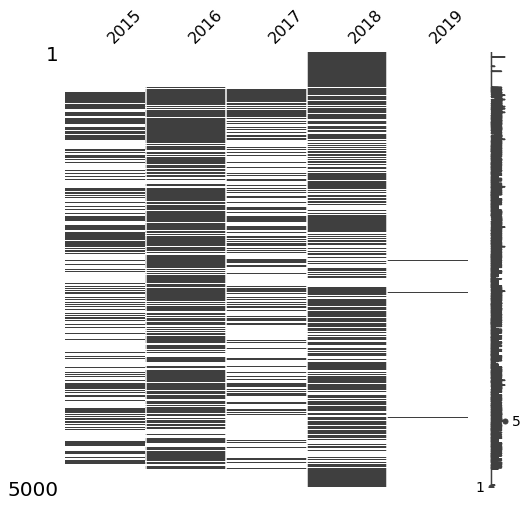

In [21]:
msno.matrix(df=data11.iloc[:, :], figsize=(8, 8))

년도별 null data가 굉장히 많이 존재하는 것을 알 수 있었다. 다음과 같은 형태로 null data를 처리하고자 한다
1. 5개의 연도 중 데이터가 하나만 존재하는 회사는 매출 상승률을 알 수 없다고 판단하였다. 이와 같은 데이터는 삭제한다.
2. 그 외의 데이터에 대해서는 평균치로 값을 제시한다. 

#### 1.2.1 null data 처리 (회사 ID삭제)

In [22]:
# 5개년 중 데이터가 하나만 존재하는 회사ID 찾기
data121 = data11[data11.notnull().sum(1) >= 2 ]

In [23]:
data121.head(500)

년도,2015,2016,2017,2018,2019
회사ID,,,,,
14271,1.199495e+06,4.257715e+06,5.005248e+06,8.388401e+06,9039340.0
44851,NaN,9.392380e+05,NaN,1.189946e+06,NaN
59533,1.947040e+05,2.077620e+05,1.242990e+05,1.446140e+05,NaN
122968,3.741538e+07,2.685872e+07,3.299792e+07,3.151447e+07,NaN
122983,2.417911e+07,2.029246e+07,9.470987e+06,NaN,NaN
123082,NaN,6.765218e+06,6.638972e+06,6.001508e+06,NaN
123219,NaN,3.754186e+06,3.934187e+06,3.699796e+06,NaN
123235,1.590260e+07,1.584647e+07,1.625944e+07,1.560860e+07,NaN
123447,8.656867e+06,7.459939e+06,NaN,6.317703e+06,NaN


#### 1.2.2 null data 처리 (2개년 평균값 대체)

2016년 데이터 대체

In [24]:
# 2015, 2017년 데이터 존재o, 2016년 데이터 존재x 
data121[data121[2016].isnull() & data121[2015].notnull() & data121[2017].notnull()]

년도,2015,2016,2017,2018,2019
회사ID,,,,,
177573,7176863.0,NaN,8017494.0,8339953.0,NaN
248638,1287054.0,NaN,914310.0,NaN,NaN
431315,35251479.0,NaN,10310196.0,NaN,NaN
463633,189688.0,NaN,226359.0,263686.0,NaN


In [25]:
# 총 4개 데이터에 대해서 2015와 2017의 평균값으로 대체
data121['mean16'] = (data121[2015] + data121[2017]) / 2
data121['new_2016'] = np.where(pd.notnull(data121[2016]) == True, data121[2016], data121['mean16'])

In [26]:
data121

년도,2015,2016,2017,2018,2019,mean16,new_2016
회사ID,,,,,,,
14271,1199495.0,4257715.0,5005248.0,8388401.0,9039340.0,3102371.5,4257715.0
44851,NaN,939238.0,NaN,1189946.0,NaN,NaN,939238.0
59533,194704.0,207762.0,124299.0,144614.0,NaN,159501.5,207762.0
122968,37415377.0,26858719.0,32997924.0,31514468.0,NaN,35206650.5,26858719.0
122983,24179108.0,20292461.0,9470987.0,NaN,NaN,16825047.5,20292461.0
...,...,...,...,...,...,...,...
515562,254818.0,384628.0,NaN,NaN,NaN,NaN,384628.0
515837,770107.0,490090.0,NaN,NaN,NaN,NaN,490090.0
516607,NaN,2586020.0,NaN,1959259.0,NaN,NaN,2586020.0


2017년 데이터 대체

In [27]:
# new_2016, 2018년 데이터 존재o, 2017년 데이터 존재x 
data121[data121[2017].isnull() & data121['new_2016'].notnull() & data121[2018].notnull()]

년도,2015,2016,2017,2018,2019,mean16,new_2016
회사ID,,,,,,,
44851,NaN,939238.0,NaN,1189946.0,NaN,NaN,939238.0
123447,8656867.0,7459939.0,NaN,6317703.0,NaN,NaN,7459939.0
124913,NaN,474740.0,NaN,484432.0,NaN,NaN,474740.0
125065,457536.0,432517.0,NaN,470243.0,NaN,NaN,432517.0
125250,NaN,1552882.0,NaN,1522578.0,NaN,NaN,1552882.0
...,...,...,...,...,...,...,...
512507,NaN,1472229.0,NaN,1685365.0,NaN,NaN,1472229.0
512526,NaN,2418813.0,NaN,2584703.0,NaN,NaN,2418813.0
512686,NaN,1711811.0,NaN,1797909.0,NaN,NaN,1711811.0


In [28]:
# 총 796개 데이터에 대해서 2016와 2018의 평균값으로 대체
data121['mean17'] = (data121[2016] + data121[2018]) / 2
data121['new_2017'] = np.where(pd.notnull(data121[2017]) == True, data121[2017], data121['mean17'])

In [29]:
data121

년도,2015,2016,2017,2018,2019,mean16,new_2016,mean17,new_2017
회사ID,,,,,,,,,
14271,1199495.0,4257715.0,5005248.0,8388401.0,9039340.0,3102371.5,4257715.0,6323058.0,5005248.0
44851,NaN,939238.0,NaN,1189946.0,NaN,NaN,939238.0,1064592.0,1064592.0
59533,194704.0,207762.0,124299.0,144614.0,NaN,159501.5,207762.0,176188.0,124299.0
122968,37415377.0,26858719.0,32997924.0,31514468.0,NaN,35206650.5,26858719.0,29186593.5,32997924.0
122983,24179108.0,20292461.0,9470987.0,NaN,NaN,16825047.5,20292461.0,NaN,9470987.0
...,...,...,...,...,...,...,...,...,...
515562,254818.0,384628.0,NaN,NaN,NaN,NaN,384628.0,NaN,NaN
515837,770107.0,490090.0,NaN,NaN,NaN,NaN,490090.0,NaN,NaN
516607,NaN,2586020.0,NaN,1959259.0,NaN,NaN,2586020.0,2272639.5,2272639.5


2018년 데이터 대체

In [30]:
# new_2017, 2019년 데이터 존재o, 2018년 데이터 존재x 
data121[data121[2018].isnull() & data121['new_2017'].notnull() & data121[2019].notnull()]

년도,2015,2016,2017,2018,2019,mean16,new_2016,mean17,new_2017
회사ID,,,,,,,,,
130023,47451943.0,41902353.0,51714239.0,NaN,50504627.0,49583091.0,41902353.0,NaN,51714239.0
140370,1468547.0,4984597.0,12055114.0,NaN,23117883.0,6761830.5,4984597.0,NaN,12055114.0
177377,6516490.0,7282162.0,6433888.0,NaN,6111906.0,6475189.0,7282162.0,NaN,6433888.0
263195,229446.0,516949.0,1119312.0,NaN,641248.0,674379.0,516949.0,NaN,1119312.0
294367,601303965.0,535249090.0,633160910.0,NaN,875661976.0,617232437.5,535249090.0,NaN,633160910.0
297682,18950750.0,16757308.0,15805151.0,NaN,17780858.0,17377950.5,16757308.0,NaN,15805151.0
305146,8395486.0,11954244.0,13344088.0,NaN,32791140.0,10869787.0,11954244.0,NaN,13344088.0
420165,NaN,79499854.0,93111515.0,NaN,165961753.0,NaN,79499854.0,NaN,93111515.0
428380,19949519.0,1922348.0,7629581.0,NaN,6653672.0,13789550.0,1922348.0,NaN,7629581.0


In [31]:
# 총 25개 데이터에 대해서 2017와 2019의 평균값으로 대체
data121['mean18'] = (data121[2017] + data121[2019]) / 2
data121['new_2018'] = np.where(pd.notnull(data121[2018]) == True, data121[2018], data121['mean18'])

In [32]:
data121

년도,2015,2016,2017,2018,2019,mean16,new_2016,mean17,new_2017,mean18,new_2018
회사ID,,,,,,,,,,,
14271,1199495.0,4257715.0,5005248.0,8388401.0,9039340.0,3102371.5,4257715.0,6323058.0,5005248.0,7022294.0,8388401.0
44851,NaN,939238.0,NaN,1189946.0,NaN,NaN,939238.0,1064592.0,1064592.0,NaN,1189946.0
59533,194704.0,207762.0,124299.0,144614.0,NaN,159501.5,207762.0,176188.0,124299.0,NaN,144614.0
122968,37415377.0,26858719.0,32997924.0,31514468.0,NaN,35206650.5,26858719.0,29186593.5,32997924.0,NaN,31514468.0
122983,24179108.0,20292461.0,9470987.0,NaN,NaN,16825047.5,20292461.0,NaN,9470987.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
515562,254818.0,384628.0,NaN,NaN,NaN,NaN,384628.0,NaN,NaN,NaN,NaN
515837,770107.0,490090.0,NaN,NaN,NaN,NaN,490090.0,NaN,NaN,NaN,NaN
516607,NaN,2586020.0,NaN,1959259.0,NaN,NaN,2586020.0,2272639.5,2272639.5,NaN,1959259.0


In [33]:
data122 = data121[[2015,'new_2016','new_2017','new_2018',2019]]

In [34]:
data122

년도,2015,new_2016,new_2017,new_2018,2019
회사ID,,,,,
14271,1199495.0,4257715.0,5005248.0,8388401.0,9039340.0
44851,NaN,939238.0,1064592.0,1189946.0,NaN
59533,194704.0,207762.0,124299.0,144614.0,NaN
122968,37415377.0,26858719.0,32997924.0,31514468.0,NaN
122983,24179108.0,20292461.0,9470987.0,NaN,NaN
...,...,...,...,...,...
515562,254818.0,384628.0,NaN,NaN,NaN
515837,770107.0,490090.0,NaN,NaN,NaN
516607,NaN,2586020.0,2272639.5,1959259.0,NaN


## 1.3 그래프 살펴보기

In [35]:
data13 = data122.transpose()

In [36]:
data13

회사ID,14271,44851,59533,122968,122983,123082,123219,123235,123447,123464,...,514019,514152,514794,514934,515264,515562,515837,516607,516653,620445
년도,,,,,,,,,,,,,,,,,,,,,
2015,1199495.0,NaN,194704.0,37415377.0,24179108.0,NaN,NaN,15902604.0,8656867.0,NaN,...,360931.0,2257227.0,NaN,NaN,NaN,254818.0,770107.0,NaN,NaN,NaN
new_2016,4257715.0,939238.0,207762.0,26858719.0,20292461.0,6765218.0,3754186.0,15846473.0,7459939.0,1853170.0,...,324477.0,2088582.0,1027987.0,384313.0,1489321.0,384628.0,490090.0,2586020.0,1745520.0,NaN
new_2017,5005248.0,1064592.0,124299.0,32997924.0,9470987.0,6638972.0,3934187.0,16259438.0,6888821.0,1647383.0,...,NaN,2587546.0,1363052.0,422440.0,2074820.0,NaN,NaN,2272639.5,1956460.0,NaN
new_2018,8388401.0,1189946.0,144614.0,31514468.0,NaN,6001508.0,3699796.0,15608604.0,6317703.0,1760695.0,...,NaN,2578014.0,NaN,556216.0,2422405.0,NaN,NaN,1959259.0,1500046.0,1953553.0
2019,9039340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767324.0


(0.0, 10000000.0)

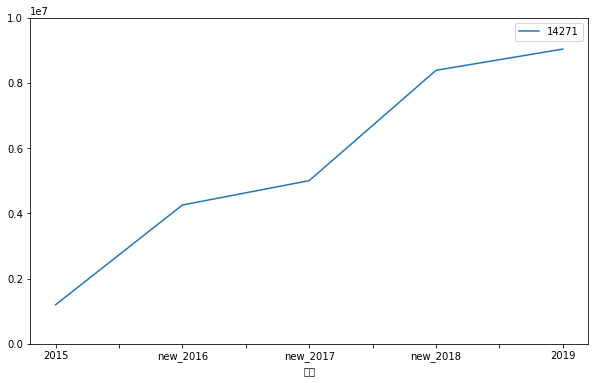

In [37]:
plt.figure(figsize=(10, 6))
data13[14271].plot()
plt.legend()
plt.ylim([0,10000000])

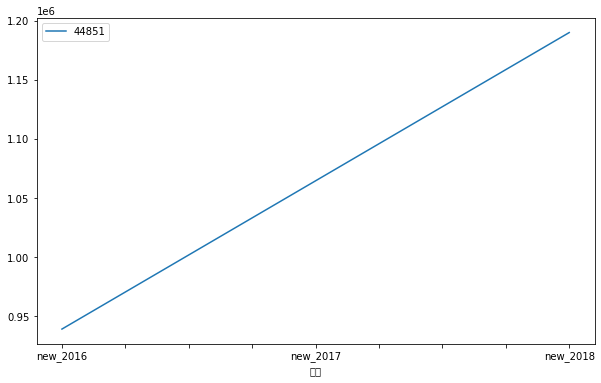

In [38]:
plt.figure(figsize=(10, 6))
data13[44851].plot()
plt.legend()

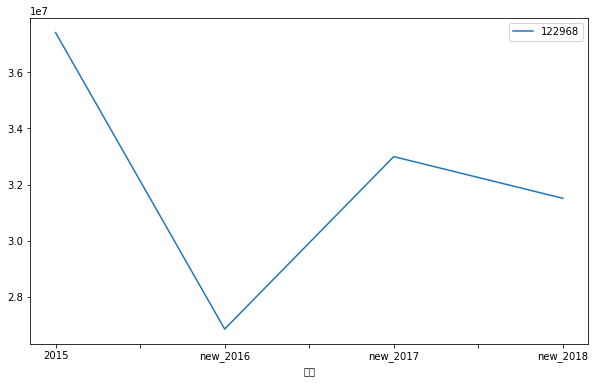

In [39]:
plt.figure(figsize=(10, 6))
data13[122968].plot()
plt.legend()

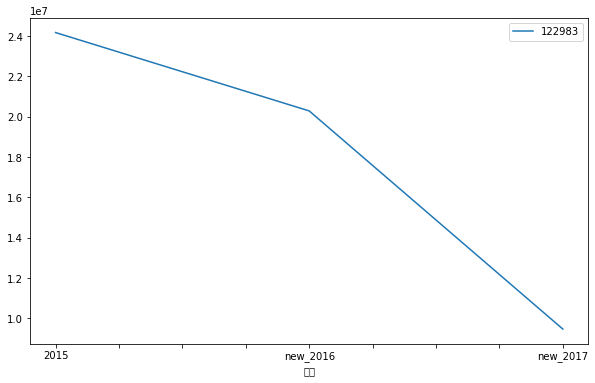

In [40]:
plt.figure(figsize=(10, 6))
data13[122983].plot()
plt.legend()

다양한 그래프가 보이고, 유니콘 기업에 가장 이상적이라고 생각되는 그래프는 첫번째 그래프이다. 
(두번재 그래프는 y축을 보면 성장률이 크다고 할 수 없음)
=> 매출액 증가율을 통해 유니콘 기업인지를 판별하는것이 좋음.

### 1.4 매출액 증가율을 통한 분석

매출액증가율(%) = (당기매출액-전기매출액)/전기매출 *100

In [41]:
data13

회사ID,14271,44851,59533,122968,122983,123082,123219,123235,123447,123464,...,514019,514152,514794,514934,515264,515562,515837,516607,516653,620445
년도,,,,,,,,,,,,,,,,,,,,,
2015,1199495.0,NaN,194704.0,37415377.0,24179108.0,NaN,NaN,15902604.0,8656867.0,NaN,...,360931.0,2257227.0,NaN,NaN,NaN,254818.0,770107.0,NaN,NaN,NaN
new_2016,4257715.0,939238.0,207762.0,26858719.0,20292461.0,6765218.0,3754186.0,15846473.0,7459939.0,1853170.0,...,324477.0,2088582.0,1027987.0,384313.0,1489321.0,384628.0,490090.0,2586020.0,1745520.0,NaN
new_2017,5005248.0,1064592.0,124299.0,32997924.0,9470987.0,6638972.0,3934187.0,16259438.0,6888821.0,1647383.0,...,NaN,2587546.0,1363052.0,422440.0,2074820.0,NaN,NaN,2272639.5,1956460.0,NaN
new_2018,8388401.0,1189946.0,144614.0,31514468.0,NaN,6001508.0,3699796.0,15608604.0,6317703.0,1760695.0,...,NaN,2578014.0,NaN,556216.0,2422405.0,NaN,NaN,1959259.0,1500046.0,1953553.0
2019,9039340.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,767324.0


In [42]:
data14 = data13.transpose()
data14['2015'] = data14[2015]
data14['2019'] = data14[2019]
data14= data14.reindex(columns=['2015','new_2016','new_2017','new_2018','2019'])
data14

년도,2015,new_2016,new_2017,new_2018,2019
회사ID,,,,,
14271,1199495.0,4257715.0,5005248.0,8388401.0,9039340.0
44851,NaN,939238.0,1064592.0,1189946.0,NaN
59533,194704.0,207762.0,124299.0,144614.0,NaN
122968,37415377.0,26858719.0,32997924.0,31514468.0,NaN
122983,24179108.0,20292461.0,9470987.0,NaN,NaN
...,...,...,...,...,...
515562,254818.0,384628.0,NaN,NaN,NaN
515837,770107.0,490090.0,NaN,NaN,NaN
516607,NaN,2586020.0,2272639.5,1959259.0,NaN


In [59]:
# 매출액 증가율 구하는 함수 
def rev_rate (a, last_year, this_year):
    return((data14.iloc[a][this_year] - data14.iloc[a][last_year]) / data14.iloc[a][this_year] * 100)

In [94]:
# 매출액 증가율 구하기 진행중 
#year = np.array(['2015','new_2016','new_2017','new_2018','2019'])
#a = pd.DataFrame(columns=['rev_rate16','rev_rate17'])

#for i in range(len(a)) :
#    for j in range(a.shape[1]) :
#        a.iloc[i,j] =  rev_rate(i,year[j],year[j+1])

In [363]:
data14.head(100)

년도,2015,new_2016,new_2017,new_2018,2019,rate_16
회사ID,,,,,,
14271,1.199495e+06,4.257715e+06,5.005248e+06,8.388401e+06,9039340.0,NaN
44851,NaN,9.392380e+05,1.064592e+06,1.189946e+06,NaN,NaN
59533,1.947040e+05,2.077620e+05,1.242990e+05,1.446140e+05,NaN,NaN
122968,3.741538e+07,2.685872e+07,3.299792e+07,3.151447e+07,NaN,NaN
122983,2.417911e+07,2.029246e+07,9.470987e+06,NaN,NaN,NaN
123082,NaN,6.765218e+06,6.638972e+06,6.001508e+06,NaN,NaN
123219,NaN,3.754186e+06,3.934187e+06,3.699796e+06,NaN,NaN
123235,1.590260e+07,1.584647e+07,1.625944e+07,1.560860e+07,NaN,NaN
123447,8.656867e+06,7.459939e+06,6.888821e+06,6.317703e+06,NaN,NaN


In [357]:
  data14['rate_16']

회사ID
14271    NaN
44851    NaN
59533    NaN
122968   NaN
122983   NaN
          ..
515562   NaN
515837   NaN
516607   NaN
516653   NaN
620445   NaN
Name: rate_16, Length: 2589, dtype: float64

# 2. 연금보험료와 직원수

In [444]:
# 날짜 변수 (년도+달)
data['날짜'] = pd.to_datetime(data['년도'].astype(str) + data['월'].astype(str), format='%Y%m').dt.strftime('%Y%m')
# 월별_월급총합 변수(월별_연금보험료/0.09)
data['월별_월급총합'] = (data['월별_연금보험료'] / 0.09).round(3)
# 월별_월급평균 변수(월별_월급총합/월별_직원수)
data['월별_월급평균'] = (data['월별_월급총합'] / data['월별_직원수']).round(3)
data

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜,월별_월급총합,월별_월급평균
0,233757,41688077,2018,7,8912380,36,201807,9.902644e+07,2750734.568
1,123464,1760695,2018,3,942380,5,201803,1.047089e+07,2094177.778
2,342124,3221341,2018,7,781180,4,201807,8.679778e+06,2169944.444
3,386420,4815584,2015,11,3795900,14,201511,4.217667e+07,3012619.048
4,129243,9799736,2018,10,40724680,151,201810,4.524964e+08,2996665.195
...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,201702,2.669711e+07,2427010.101
99797,239388,1045021,2018,10,1428800,9,201810,1.587556e+07,1763950.617
99798,272304,181898,2018,3,392560,4,201803,4.361778e+06,1090444.444
99799,362194,2100218,2018,12,874780,3,201812,9.719778e+06,3239925.926


<AxesSubplot:xlabel='날짜', ylabel='월별_직원수'>

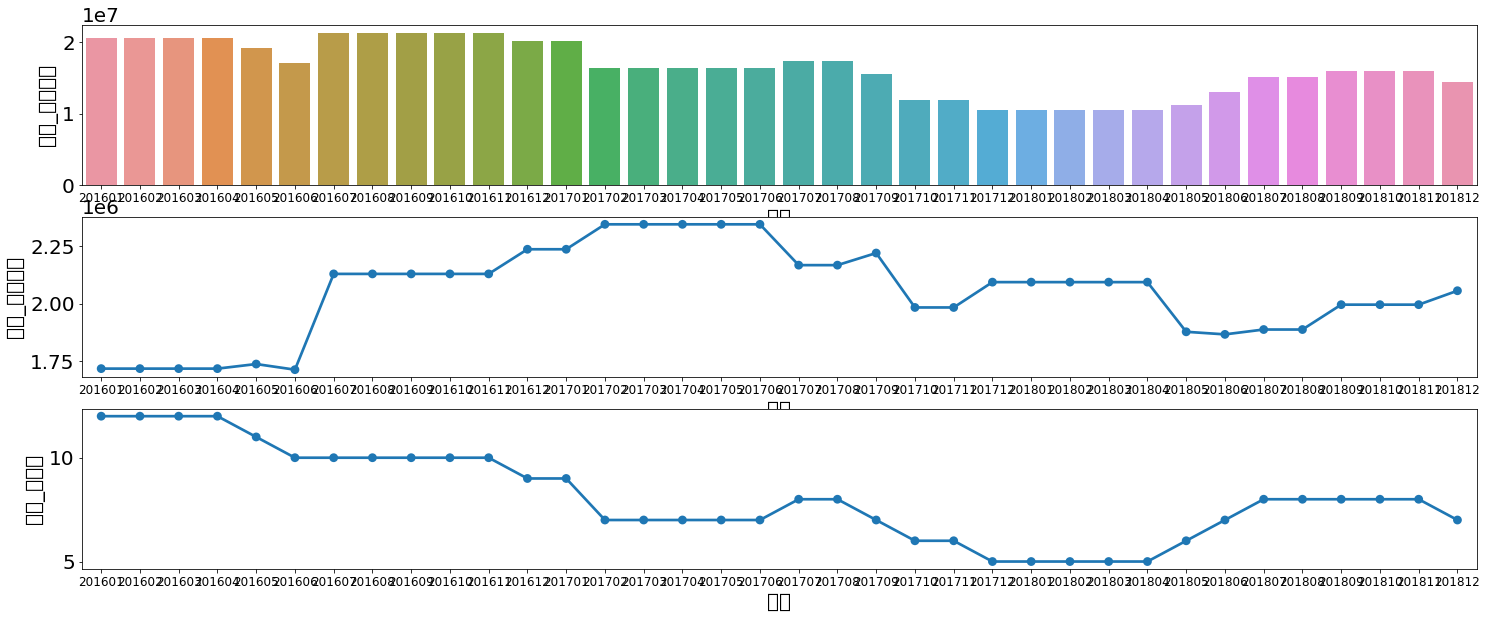

In [495]:
# 날짜&월별_월급총합 날짜&월별_월급평균, 날짜&월별_직원수 변화 그래프
f, ax = plt.subplots(3, 1, figsize=(25, 10))

sns.barplot(x="날짜", y="월별_월급총합", data=data[data['회사ID'] == 123464].sort_values(by=['날짜']), ax=ax[0])
sns.pointplot(data=data[data['회사ID'] == 123464].sort_values(by=['날짜']), x='날짜', y='월별_월급평균', ax=ax[1])
sns.pointplot(data=data[data['회사ID'] == 123464].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[2])

월별로 평균 월급이 차이가 나느 이유는 무엇일까? 
특히 월급이 왜 떨어질까?

In [519]:
#월별_웗급평균이 높은 회사 상위 10개
df_월급평균 = data.sort_values(by=['월별_월급평균'], ascending=[False])['회사ID'].unique()
print(df_월급평균[:10])

[ 228293 3312354  416507  188828  283021  196549  126831   30694  283380
      63]


<AxesSubplot:xlabel='날짜', ylabel='월별_직원수'>

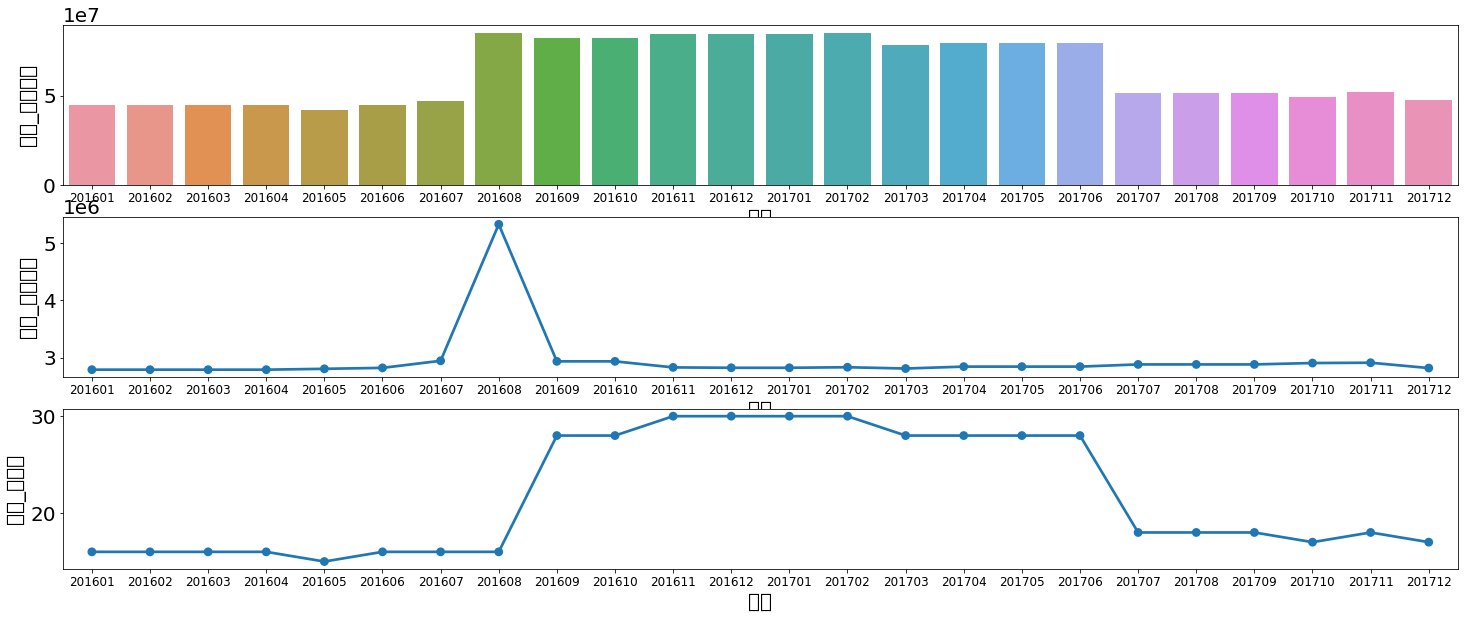

In [496]:
# 날짜&월별_월급총합 날짜&월별_월급평균, 날짜&월별_직원수 변화 그래프
f, ax = plt.subplots(3, 1, figsize=(25, 10))

sns.barplot(x="날짜", y="월별_월급총합", data=data[data['회사ID'] == 228293].sort_values(by=['날짜']), ax=ax[0])
sns.pointplot(data=data[data['회사ID'] == 228293].sort_values(by=['날짜']), x='날짜', y='월별_월급평균', ax=ax[1])
sns.pointplot(data=data[data['회사ID'] == 228293].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[2])

In [493]:
df_228293

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜,월별_월급총합,월별_월급평균
9690,228293,9153391,2016,1,4016580,16,201601,4.462867e+07,2789291.667
13221,228293,9153391,2016,2,4016580,16,201602,4.462867e+07,2789291.667
30589,228293,9153391,2016,3,4016580,16,201603,4.462867e+07,2789291.667
81283,228293,9153391,2016,4,4016580,16,201604,4.462867e+07,2789291.667
8386,228293,9153391,2016,5,3785720,15,201605,4.206356e+07,2804237.037
44700,228293,9153391,2016,6,4062020,16,201606,4.513356e+07,2820847.222
16562,228293,9153391,2016,7,4240160,16,201607,4.711289e+07,2944555.556
785,228293,9153391,2016,8,7677140,16,201608,8.530156e+07,5331347.222
28332,228293,9153391,2016,9,7395440,28,201609,8.217156e+07,2934698.413
10975,228293,9153391,2016,10,7395440,28,201610,8.217156e+07,2934698.413


<AxesSubplot:xlabel='날짜', ylabel='월별_직원수'>

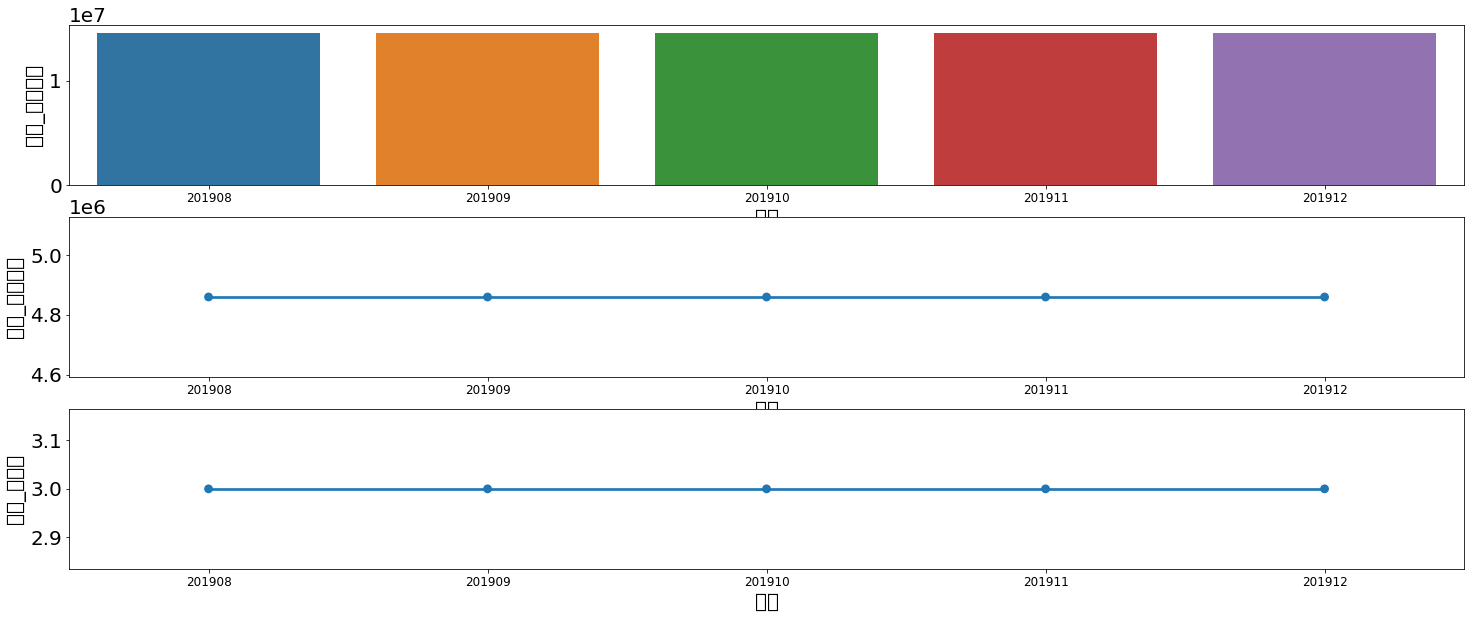

In [497]:
# 날짜&월별_월급총합 날짜&월별_월급평균, 날짜&월별_직원수 변화 그래프
f, ax = plt.subplots(3, 1, figsize=(25, 10))

sns.barplot(x="날짜", y="월별_월급총합", data=data[data['회사ID'] == 3312354].sort_values(by=['날짜']), ax=ax[0])
sns.pointplot(data=data[data['회사ID'] == 3312354].sort_values(by=['날짜']), x='날짜', y='월별_월급평균', ax=ax[1])
sns.pointplot(data=data[data['회사ID'] == 3312354].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[2])

In [492]:
df_3312354

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,날짜,월별_월급총합,월별_월급평균
47412,3312354,1451563,2019,8,1312200,3,201908,14580000.0,4860000.0
244,3312354,1451563,2019,9,1312200,3,201909,14580000.0,4860000.0
38757,3312354,1451563,2019,10,1312200,3,201910,14580000.0,4860000.0
49019,3312354,1451563,2019,11,1312200,3,201911,14580000.0,4860000.0
72163,3312354,1451563,2019,12,1312200,3,201912,14580000.0,4860000.0


<AxesSubplot:xlabel='날짜', ylabel='월별_직원수'>

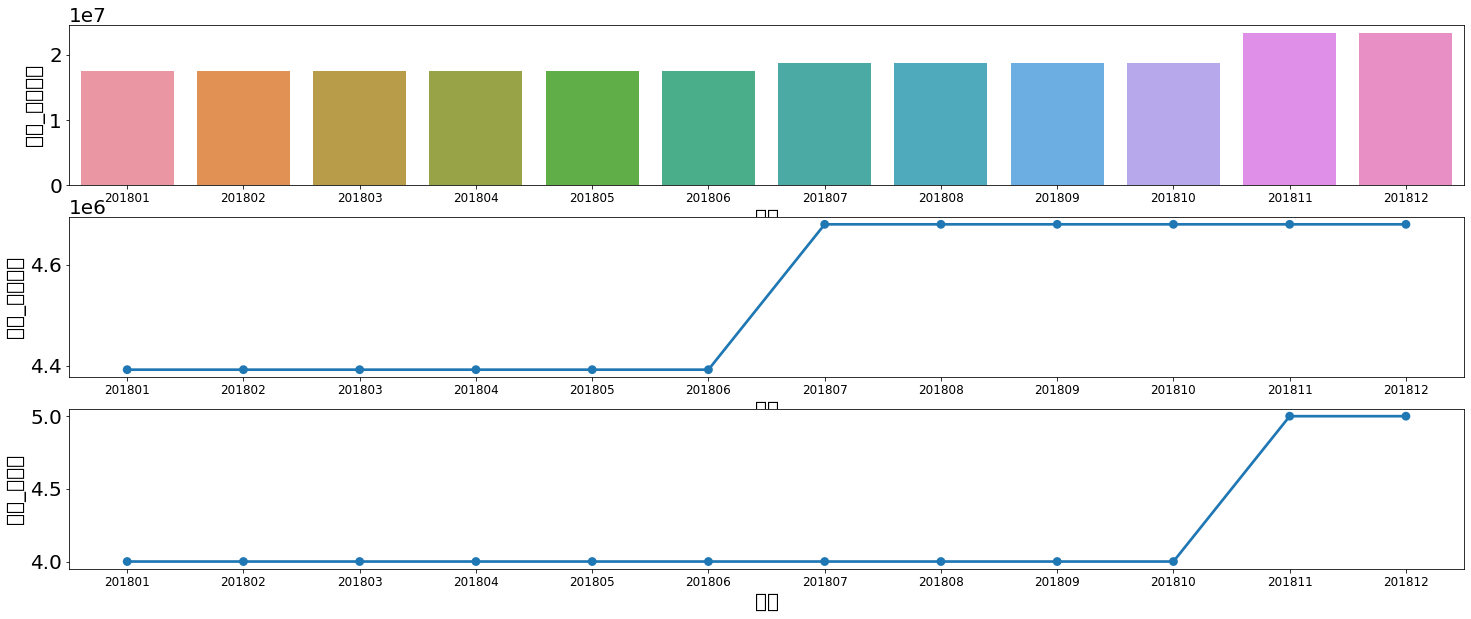

In [498]:
# 날짜&월별_월급총합 날짜&월별_월급평균, 날짜&월별_직원수 변화 그래프
f, ax = plt.subplots(3, 1, figsize=(25, 10))

sns.barplot(x="날짜", y="월별_월급총합", data=data[data['회사ID'] == 416507].sort_values(by=['날짜']), ax=ax[0])
sns.pointplot(data=data[data['회사ID'] == 416507].sort_values(by=['날짜']), x='날짜', y='월별_월급평균', ax=ax[1])
sns.pointplot(data=data[data['회사ID'] == 416507].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[2])

<AxesSubplot:xlabel='날짜', ylabel='월별_직원수'>

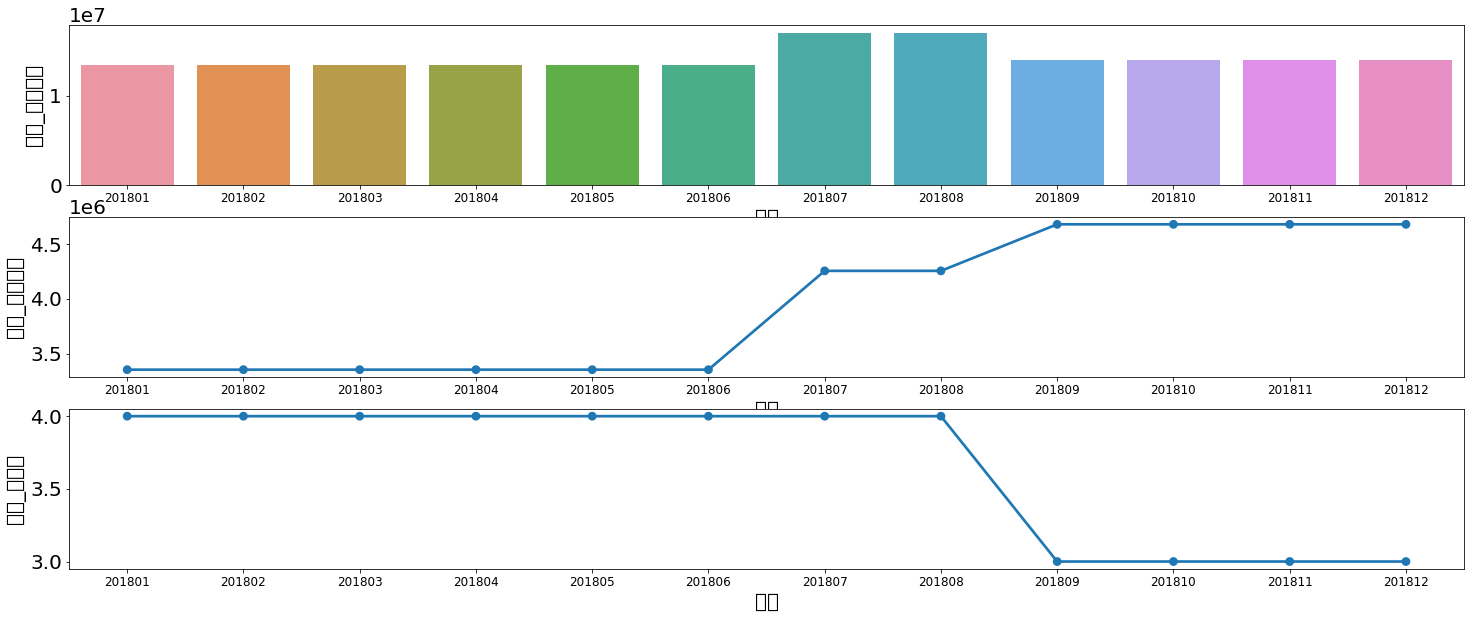

In [521]:
# 날짜&월별_월급총합 날짜&월별_월급평균, 날짜&월별_직원수 변화 그래프
f, ax = plt.subplots(3, 1, figsize=(25, 10))

sns.barplot(x="날짜", y="월별_월급총합", data=data[data['회사ID'] == 283021].sort_values(by=['날짜']), ax=ax[0])
sns.pointplot(data=data[data['회사ID'] == 283021].sort_values(by=['날짜']), x='날짜', y='월별_월급평균', ax=ax[1])
sns.pointplot(data=data[data['회사ID'] == 283021].sort_values(by=['날짜']), x='날짜', y='월별_직원수', ax=ax[2])